# Klasyfikator Naive Bayes do klasyfikacji artykułów sportowych

Ten notatnik zawiera klasyfikator Naive Bayes z biblioteki scikit-learn do klasyfikacji tekstu na kategorie sportowe.


## Krok 1: Instalacja wymaganych bibliotek (jeśli potrzebne)

Jeśli nie masz zainstalowanych bibliotek, uruchom w terminalu:
```
pip install scikit-learn seaborn matplotlib
```

## Krok 2: Importowanie bibliotek


In [ ]:
# Importowanie niezbędnych bibliotek
import json  # Do wczytywania danych z pliku JSON
from collections import Counter  # Do liczenia kategorii
import numpy as np  # Do operacji na macierzach
import matplotlib.pyplot as plt  # Do tworzenia wykresów
import seaborn as sns  # Do ładnych wizualizacji statystycznych
from sklearn.model_selection import train_test_split  # Do podziału danych
from sklearn.naive_bayes import MultinomialNB  # Gotowy klasyfikator Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer  # Konwertuje tekst na liczby
from sklearn.pipeline import Pipeline  # Łączy wektoryzację i klasyfikację
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Metryki

# Ustawienie stylu wykresów
sns.set_style("whitegrid")  # Białe tło z siatką
plt.rcParams['figure.figsize'] = (12, 8)  # Domyślny rozmiar wykresów
plt.rcParams['font.size'] = 10  # Rozmiar czcionki

print("Biblioteki zaimportowane!")

Biblioteki zaimportowane!


## Krok 1: Wczytanie danych


In [ ]:
# Wczytanie danych z pliku JSON
file_path = 'sport_url_scraper/selected_articles.json'  # Ścieżka do pliku z danymi

# Otwieramy plik i wczytujemy dane
with open(file_path, 'r', encoding='utf-8') as f:  # 'r' = tryb odczytu, 'utf-8' = kodowanie polskich znaków
    data = json.load(f)  # Wczytuje całą zawartość pliku JSON jako listę słowników

# Wyświetlenie podstawowych informacji o danych
print(f"Liczba artykułów: {len(data)}")  # Ile mamy artykułów w sumie
print(f"Przykładowy artykuł: {data[0]}")  # Wyświetlamy pierwszy artykuł jako przykład

# Wyjaśnienie:
# - data to lista słowników, każdy słownik ma klucze: 'text' (treść) i 'label' (kategoria)  

Liczba artykułów: 3042
Przykładowy artykuł: {'text': 'The Pittsburgh Steelers "would love" to play an NFL game in Ireland in the future, says director of business development and strategy Dan Rooney. A regular-season NFL game has never taken place in Ireland but the Steelers faced the Chicago Bears in a pre-season match at Croke Park in 1997. The Aviva Stadium in Dublin has also hosted college football matches in recent years. "It\'s been a goal from the start, being able to pursue an opportunity to play a live game in front of the Irish fans," said Rooney, speaking to BBC Sport NI at a Steelers training camp in Belfast.  "We are working with the NFL on that and we\'re looking forward to seeing what\'s coming."\n\nThe NFL has held regular-season games in London since 2007 and has been expanding across Europe in recent years, with Germany hosting its first game in 2022 and Spain set to follow in 2025.A feasibility study for further expansion across Europe - including into Dublin - has s

## Krok 2: Przygotowanie danych treningowych i testowych


In [ ]:
# Podział danych na zbiór treningowy (80%) i testowy (20%)

# Przygotowanie listy tekstów i etykiet
texts = []  # Lista z tekstami artykułów
labels = []  # Lista z kategoriami (etykietami)

# Przejście przez wszystkie artykuły i wyciągnięcie tekstu i etykiety
for article in data:
    texts.append(article['text'])  # Dodajemy tekst artykułu
    labels.append(article['label'])  # Dodajemy kategorię (np. "football", "cricket")

# Podział na zbiór treningowy (80%) i testowy (20%)
# random_state=42 zapewnia, że podział będzie zawsze taki sam (do reprodukcji wyników)
# stratify=labels zapewnia, że proporcje kategorii są zachowane w obu zbiorach
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Zbiór treningowy: {len(X_train)} artykułów")
print(f"Zbiór testowy: {len(X_test)} artykułów")
print(f"Kategorie w zbiorze treningowym: {Counter(y_train)}")

# Wyjaśnienie:
# - X_train, X_test: teksty artykułów (X = cechy/features)
# - y_train, y_test: kategorie (y = etykiety/labels)
# - test_size=0.2 oznacza 20% danych na test, 80% na trening
# - stratify zapewnia równomierny podział kategorii


Zbiór treningowy: 2433 artykułów
Zbiór testowy: 609 artykułów
Kategorie w zbiorze treningowym: Counter({'rugby-union': 320, 'football': 320, 'formula1': 320, 'cricket': 320, 'boxing': 307, 'rugby-league': 267, 'tennis': 213, 'american-football': 199, 'mixed-martial-arts': 167})


## Krok 3: Utworzenie i trenowanie klasyfikatora Naive Bayes


In [ ]:
# Utworzenie pipeline'u
# Pipeline automatycznie wykonuje: wektoryzacja -> klasyfikacja
# CountVectorizer: zamienia tekst na macierz liczb (każde słowo = kolumna, liczba wystąpień = wartość)
# MultinomialNB: gotowy klasyfikator Naive Bayes dla danych tekstowych

classifier = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,        # Zamienia na małe litery
        token_pattern=r'\b[a-z]+\b',  # Wzorzec dla słów (tylko litery)
        min_df=2,             # Ignoruj słowa występujące w mniej niż 2 dokumentach
        max_features=10000    # Maksymalnie 10000 najczęstszych słów
    )),
    ('classifier', MultinomialNB(alpha=1.0))  # alpha=1.0 to wygładzanie Laplace'a
])

print("="*80)
print("KLASYKATOR NAIVE BAYES Z SCIKIT-LEARN")
print("="*80)
print("\nTrenowanie klasyfikatora...")

# Trenowanie (automatycznie wykonuje wektoryzację i trening)
classifier.fit(X_train, y_train)

print("✓ Wytrenowano!")
print(f"Liczba cech (słów): {len(classifier.named_steps['vectorizer'].vocabulary_)}")

# Wyjaśnienie:
# - Pipeline łączy wektoryzację i klasyfikację w jeden proces
# - CountVectorizer automatycznie konwertuje tekst na liczby
# - MultinomialNB to zoptymalizowany algorytm Naive Bayes
# - alpha=1.0 to wygładzanie Laplace'a (zapobiega zerowym prawdopodobieństwom)


KLASYKATOR NAIVE BAYES Z SCIKIT-LEARN

Trenowanie klasyfikatora...
✓ Wytrenowano!
Liczba cech (słów): 10000


## Krok 4: Przewidywanie i ocena klasyfikatora


In [ ]:
# Przewidywanie kategorii dla zbioru testowego
print("Przewidywanie kategorii dla zbioru testowego...")
predictions = classifier.predict(X_test)

# Obliczenie dokładności
accuracy = accuracy_score(y_test, predictions) * 100

print(f"\n{'='*80}")
print(f"DOKŁADNOŚĆ: {accuracy:.2f}%")
print(f"{'='*80}")

# Szczegółowy raport klasyfikacji
print("\nSzczegółowy raport klasyfikacji:")
print("="*80)
print(classification_report(y_test, predictions))
print("="*80)

# Wyjaśnienie:
# - predictions: lista przewidzianych kategorii
# - accuracy_score: oblicza dokładność automatycznie
# - classification_report: pokazuje precision, recall, f1-score dla każdej kategorii


Przewidywanie kategorii dla zbioru testowego...

DOKŁADNOŚĆ: 99.34%

Szczegółowy raport klasyfikacji:
                    precision    recall  f1-score   support

 american-football       1.00      1.00      1.00        50
            boxing       1.00      1.00      1.00        77
           cricket       1.00      1.00      1.00        80
          football       1.00      0.96      0.98        80
          formula1       1.00      1.00      1.00        80
mixed-martial-arts       1.00      1.00      1.00        42
      rugby-league       1.00      0.99      0.99        67
       rugby-union       0.95      1.00      0.98        80
            tennis       1.00      1.00      1.00        53

          accuracy                           0.99       609
         macro avg       0.99      0.99      0.99       609
      weighted avg       0.99      0.99      0.99       609



## Krok 5: Wizualizacja macierzy pomyłek



american-football:
  Poprawne przewidywania: 50
  Błędne przewidywania: 0
  Precision: 100.00%
  Recall: 100.00%
  Accuracy: 100.00%

boxing:
  Poprawne przewidywania: 77
  Błędne przewidywania: 0
  Precision: 100.00%
  Recall: 100.00%
  Accuracy: 100.00%

cricket:
  Poprawne przewidywania: 80
  Błędne przewidywania: 0
  Precision: 100.00%
  Recall: 100.00%
  Accuracy: 100.00%

football:
  Poprawne przewidywania: 77
  Błędne przewidywania: 3
  Precision: 100.00%
  Recall: 96.25%
  Accuracy: 96.25%

formula1:
  Poprawne przewidywania: 80
  Błędne przewidywania: 0
  Precision: 100.00%
  Recall: 100.00%
  Accuracy: 100.00%

mixed-martial-arts:
  Poprawne przewidywania: 42
  Błędne przewidywania: 0
  Precision: 100.00%
  Recall: 100.00%
  Accuracy: 100.00%

rugby-league:
  Poprawne przewidywania: 66
  Błędne przewidywania: 1
  Precision: 100.00%
  Recall: 98.51%
  Accuracy: 98.51%

rugby-union:
  Poprawne przewidywania: 80
  Błędne przewidywania: 4
  Precision: 95.24%
  Recall: 100.00%
  

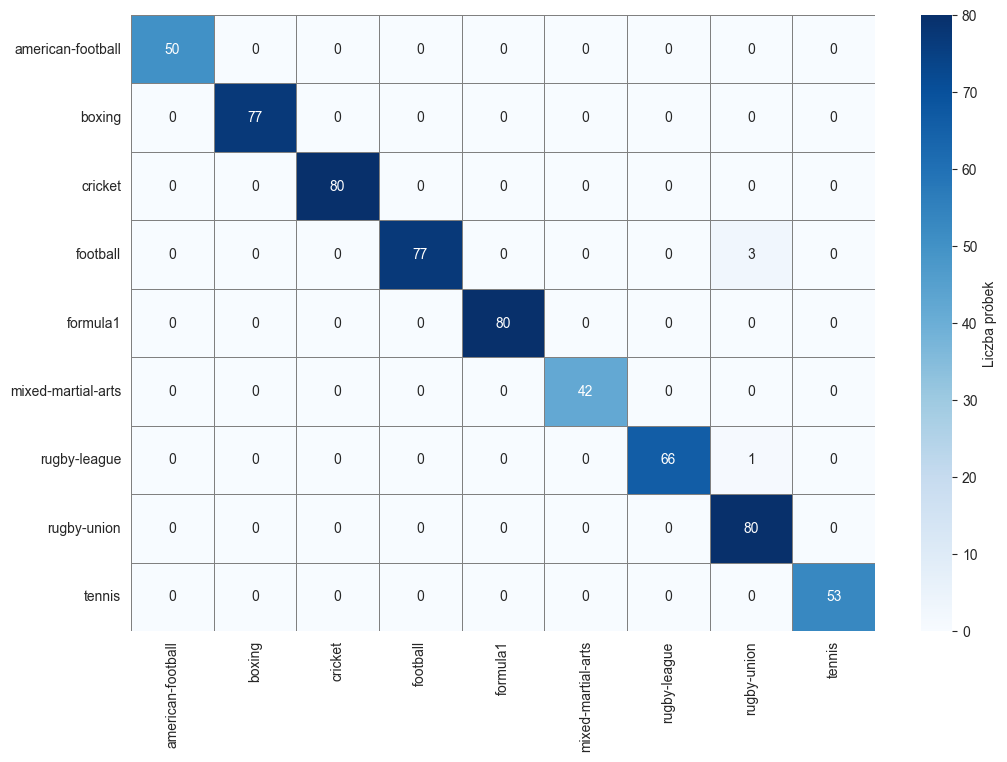

In [ ]:
from sklearn.utils.multiclass import unique_labels

# Obliczenie macierzy pomyłek — upewniamy się, że etykiety są spójne
labels = list(unique_labels(y_test, predictions))           # etykiety w używanej kolejności
cm = confusion_matrix(y_test, predictions, labels=labels)  # wymuszamy tę samą kolejność
categories = labels                                        # używamy tej listy dalej

# ...existing code...
sns.heatmap(
    cm,  # Macierz pomyłek
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=categories,
    yticklabels=categories,
    cbar_kws={'label': 'Liczba próbek'},
    linewidths=0.5,
    linecolor='gray'
)
# ...existing code...

# Dla każdej kategorii obliczamy precision, recall i accuracy
for i, category in enumerate(categories):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    accuracy_cat = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0

    print(f"\n{category}:")
    print(f"  Poprawne przewidywania: {tp}")
    print(f"  Błędne przewidywania: {fp + fn}")
    print(f"  Precision: {precision*100:.2f}%")
    print(f"  Recall: {recall*100:.2f}%")
    print(f"  Accuracy: {accuracy_cat*100:.2f}%")

print("="*80)

# Wyjaśnienie:
# - Macierz pomyłek pokazuje, ile razy każda kategoria została poprawnie/niepoprawnie przewidziana
# - Na przekątnej są poprawne przewidywania
# - Poza przekątną są błędy klasyfikacji
